# Read and explore data

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot
import seaborn as sns

### Read Data

In [2]:
applications_data = pd.read_csv('../data/BPI_Challenge_2017.csv')

In [3]:
applications_data.columns.values

array(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name',
       'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms',
       'Accepted', 'MonthlyCost', 'Selected', 'CreditScore',
       'OfferedAmount', 'OfferID'], dtype=object)

#### Fix column names 

In [4]:
fix_cols_names = lambda x: re.sub( '(?<!^)(?=[A-Z])', '_', x.replace('ID','Id')).lower().replace(':','_').replace('__','_')
fixed_app_cols = [fix_cols_names(col) for col in applications_data.columns]
fixed_app_cols

['action',
 'org_resource',
 'concept_name',
 'event_origin',
 'event_id',
 'lifecycle_transition',
 'time_timestamp',
 'case_loan_goal',
 'case_application_type',
 'case_concept_name',
 'case_requested_amount',
 'first_withdrawal_amount',
 'number_of_terms',
 'accepted',
 'monthly_cost',
 'selected',
 'credit_score',
 'offered_amount',
 'offer_id']

In [5]:
applications_data.columns = fixed_app_cols

##### Rename a few columns which are heavily used and whose names are not descriptive 

In [7]:
applications_data = applications_data.rename(index=str, columns={'case_concept_name':'app_id',
                                                                 'concept_name':'event_name'})

In [8]:
applications_data.head()

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
applications_data.dtypes

action                      object
org_resource                object
event_name                  object
event_origin                object
event_id                    object
lifecycle_transition        object
time_timestamp              object
case_loan_goal              object
case_application_type       object
app_id                      object
case_requested_amount      float64
first_withdrawal_amount    float64
number_of_terms            float64
accepted                    object
monthly_cost               float64
selected                    object
credit_score               float64
offered_amount             float64
offer_id                    object
dtype: object

##### Examining a few application cases

In [16]:
applications_data.app_id.sample(3, random_state=199)

744379    Application_427281832
499692    Application_107994915
352925    Application_989951800
Name: app_id, dtype: object

In [13]:
applications_data[applications_data['app_id'] == 'Application_427281832']

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
744350,Created,User_47,A_Create Application,Application,Application_427281832,complete,2016-08-20 12:41:18.494000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744351,Created,User_47,W_Complete application,Workflow,Workitem_1735726912,schedule,2016-08-20 12:41:18.505000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744352,Obtained,User_47,W_Complete application,Workflow,Workitem_1765392845,start,2016-08-20 12:41:18.509000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744353,statechange,User_47,A_Concept,Application,ApplState_1358958264,complete,2016-08-20 12:41:18.513000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744354,statechange,User_47,A_Accepted,Application,ApplState_1798506103,complete,2016-08-20 12:47:13.474000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744355,Created,User_47,O_Create Offer,Offer,Offer_1116778906,complete,2016-08-20 12:58:12.929000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,2914.0,60.0,True,399.01,True,884.0,21500.0,NaN
744356,statechange,User_47,O_Created,Offer,OfferState_408317779,complete,2016-08-20 12:58:13.817000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1116778906
744357,statechange,User_47,O_Sent (mail and online),Offer,OfferState_749651020,complete,2016-08-20 13:00:16.695000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1116778906
744358,Deleted,User_47,W_Complete application,Workflow,Workitem_949622816,complete,2016-08-20 13:00:16.711000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744359,Created,User_47,W_Call after offers,Workflow,Workitem_1326852635,schedule,2016-08-20 13:00:16.718000+00:00,Existing loan takeover,New credit,Application_427281832,21500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
applications_data[applications_data['app_id'] == 'Application_107994915']

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
499676,Created,User_48,A_Create Application,Application,Application_107994915,complete,2016-06-16 09:40:00.529000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499677,Created,User_48,W_Complete application,Workflow,Workitem_1652592509,schedule,2016-06-16 09:40:00.539000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499678,Obtained,User_48,W_Complete application,Workflow,Workitem_602661847,start,2016-06-16 09:40:00.542000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499679,statechange,User_48,A_Concept,Application,ApplState_1107480866,complete,2016-06-16 09:40:00.545000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499680,Released,User_16,W_Complete application,Workflow,Workitem_720081780,suspend,2016-06-16 09:43:43.539000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499681,statechange,User_48,A_Accepted,Application,ApplState_1476899466,complete,2016-06-16 09:44:36.171000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499682,Created,User_48,O_Create Offer,Offer,Offer_1992042770,complete,2016-06-16 09:52:57.264000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,0.0,134.0,True,100.0,False,0.0,10000.0,NaN
499683,statechange,User_48,O_Created,Offer,OfferState_91000279,complete,2016-06-16 09:52:58.552000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1992042770
499684,statechange,User_48,O_Sent (mail and online),Offer,OfferState_1937050386,complete,2016-06-16 09:53:32.645000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1992042770
499685,Deleted,User_48,W_Complete application,Workflow,Workitem_556732048,ate_abort,2016-06-16 09:53:32.660000+00:00,Existing loan takeover,New credit,Application_107994915,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
applications_data[applications_data['app_id'] == 'Application_989951800']

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
352891,Created,User_1,A_Create Application,Application,Application_989951800,complete,2016-04-29 21:30:17.116000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352892,statechange,User_1,A_Submitted,Application,ApplState_1169573196,complete,2016-04-29 21:30:17.157000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352893,Created,User_1,W_Handle leads,Workflow,Workitem_1182222933,schedule,2016-04-29 21:30:17.509000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352894,Deleted,User_1,W_Handle leads,Workflow,Workitem_1978664372,withdraw,2016-04-29 21:31:02.080000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352895,Created,User_1,W_Complete application,Workflow,Workitem_1672074652,schedule,2016-04-29 21:31:02.099000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352896,statechange,User_1,A_Concept,Application,ApplState_1527528518,complete,2016-04-29 21:31:02.105000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352897,Obtained,User_48,W_Complete application,Workflow,Workitem_589777856,start,2016-04-30 12:04:46.814000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352898,Released,User_48,W_Complete application,Workflow,Workitem_1773287238,suspend,2016-04-30 12:07:23.950000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352899,Obtained,User_40,W_Complete application,Workflow,Workitem_630409170,resume,2016-05-02 12:33:36.770000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352900,Released,User_40,W_Complete application,Workflow,Workitem_917216246,suspend,2016-05-02 12:36:08.561000+00:00,Car,New credit,Application_989951800,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Structure data by year-week

In [17]:
applications_data['datetime'] = pd.to_datetime(applications_data.time_timestamp)
applications_data['week'] = applications_data['datetime'].dt.strftime('%G-%V')

In [18]:
applications_data

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,...,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,datetime,week
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.304000+00:00,2015-53
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.352000+00:00,2015-53
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.774000+00:00,2015-53
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.392000+00:00,2015-53
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.403000+00:00,2015-53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 06:33:02.212000+00:00,2017-01
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 06:33:02.221000+00:00,2017-01
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-16 09:51:21.114000+00:00,2017-03
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144,2017-01-16 09:51:21.139000+00:00,2017-03


### Explore Data per Week

#### What is the number of events per week? 

In [19]:
events_per_week = applications_data.week.value_counts().reset_index() \
                    .rename(index = str, columns = {'index':'week',
                                                    'week':'num_events'}) \
                    .sort_values('week') 
events_per_week

,week,num_events
56,2015-53,887
52,2016-01,9905
50,2016-02,15405
49,2016-03,16855
43,2016-04,18487
35,2016-05,20782
42,2016-06,19531
33,2016-07,21234
31,2016-08,22072
25,2016-09,23632


In [20]:
events_per_week.dtypes

week          object
num_events     int64
dtype: object

Text(0.5, 1.0, 'Number of Events per Week')

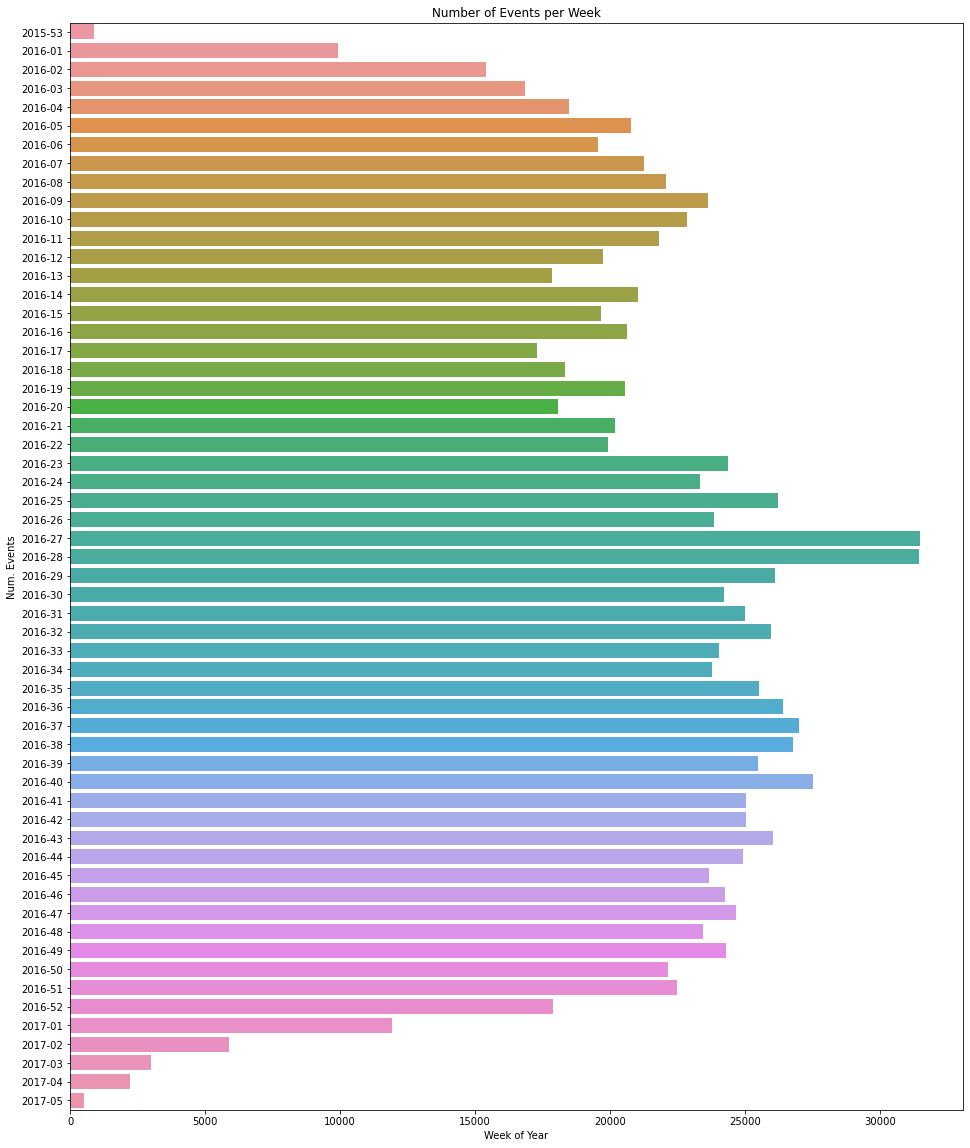

In [25]:
fig, ax = pyplot.subplots(figsize=(16,20))
g = sns.barplot(data = events_per_week, x ='num_events', y='week');
g.set_xlabel('Week of Year')
g.set_ylabel('Num. Events')
g.set_title('Number of Events per Week')

#### What is the total applications requested amount per week?

In [26]:
applications_data['event_name'].value_counts()

W_Validate application        209496
W_Call after offers           191092
W_Call incomplete files       168529
W_Complete application        148900
W_Handle leads                 47264
O_Create Offer                 42995
O_Created                      42995
O_Sent (mail and online)       39707
A_Validating                   38816
A_Create Application           31509
A_Accepted                     31509
A_Concept                      31509
A_Complete                     31362
O_Returned                     23305
A_Incomplete                   23055
O_Cancelled                    20898
A_Submitted                    20423
A_Pending                      17228
O_Accepted                     17228
A_Cancelled                    10431
O_Refused                       4695
A_Denied                        3753
W_Assess potential fraud        3282
O_Sent (online only)            2026
W_Shortened completion           238
W_Personal Loan collection        22
Name: event_name, dtype: int64

In [27]:
apps_pending = applications_data[applications_data['event_name'].isin(['A_Pending'])]
apps_pending

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,...,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,datetime,week
38,statechange,User_115,A_Pending,Application,ApplState_1179730815,complete,2016-01-14 15:49:11.420000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-14 15:49:11.420000+00:00,2016-02
114,statechange,User_90,A_Pending,Application,ApplState_16917315,complete,2016-01-14 07:00:14.450000+00:00,Home improvement,New credit,Application_428409768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-14 07:00:14.450000+00:00,2016-02
197,statechange,User_95,A_Pending,Application,ApplState_1840619616,complete,2016-01-28 12:18:51.292000+00:00,Car,New credit,Application_1746793196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-28 12:18:51.292000+00:00,2016-04
363,statechange,User_119,A_Pending,Application,ApplState_1373444220,complete,2016-01-22 08:03:30.899000+00:00,Car,New credit,Application_619403287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-22 08:03:30.899000+00:00,2016-03
428,statechange,User_75,A_Pending,Application,ApplState_788894388,complete,2016-01-27 09:25:38.989000+00:00,"Other, see explanation",New credit,Application_1529124572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-27 09:25:38.989000+00:00,2016-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202031,statechange,User_133,A_Pending,Application,ApplState_2038793609,complete,2017-01-10 15:35:46.242000+00:00,Car,New credit,Application_965278193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-10 15:35:46.242000+00:00,2017-02
1202066,statechange,User_134,A_Pending,Application,ApplState_1635820501,complete,2017-01-23 06:19:27.972000+00:00,Home improvement,New credit,Application_1331346987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-23 06:19:27.972000+00:00,2017-04
1202111,statechange,User_83,A_Pending,Application,ApplState_407324650,complete,2017-01-23 07:06:27.167000+00:00,Car,New credit,Application_1107993134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-23 07:06:27.167000+00:00,2017-04
1202191,statechange,User_30,A_Pending,Application,ApplState_356117270,complete,2017-01-23 07:44:22.568000+00:00,Home improvement,New credit,Application_59622033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-23 07:44:22.568000+00:00,2017-04


In [28]:
apps_pending_per_week = (apps_pending.groupby('week').app_id.count().reset_index() 
                            .rename(index=str, columns={'app_id':'num_pending_apps'}))
apps_pending_per_week

,week,num_pending_apps
0,2016-01,4
1,2016-02,131
2,2016-03,240
3,2016-04,214
4,2016-05,228
5,2016-06,227
6,2016-07,221
7,2016-08,459
8,2016-09,293
9,2016-10,290


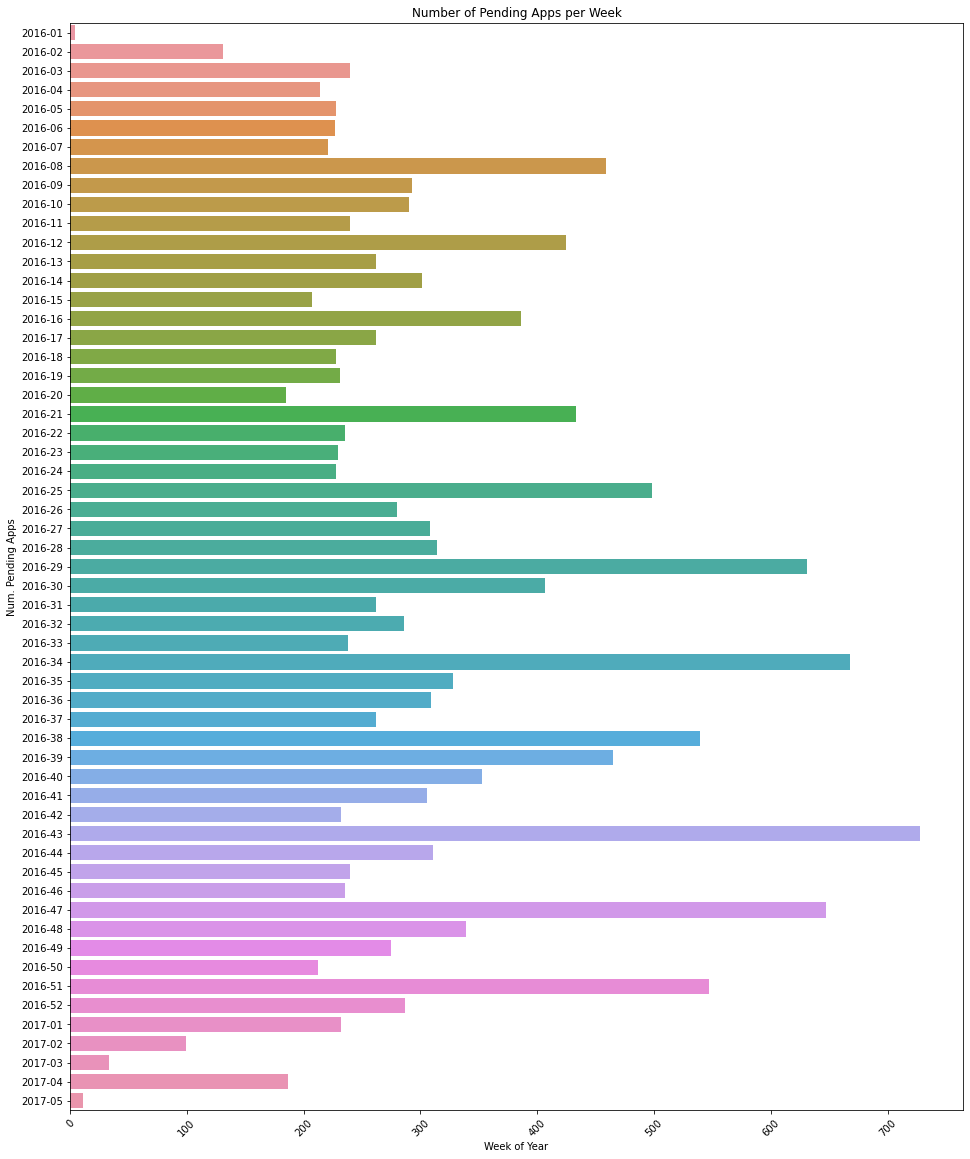

In [30]:
fig, ax = pyplot.subplots(figsize=(16,20))
g = sns.barplot(data = apps_pending_per_week, x ='num_pending_apps', y='week');
g.set_xlabel('Week of Year')
g.set_ylabel('Num. Pending Apps')
g.set_title('Number of Pending Apps per Week')
pyplot.xticks(rotation=45);

In [31]:
req_amt_per_week = apps_pending.groupby(['week']).case_requested_amount.sum().reset_index()
req_amt_per_week

,week,case_requested_amount
0,2016-01,48400.00
1,2016-02,1767400.00
2,2016-03,3735550.00
3,2016-04,2975161.00
4,2016-05,3820682.00
5,2016-06,3398175.00
6,2016-07,3358200.00
7,2016-08,6870489.00
8,2016-09,4207850.00
9,2016-10,4291985.00


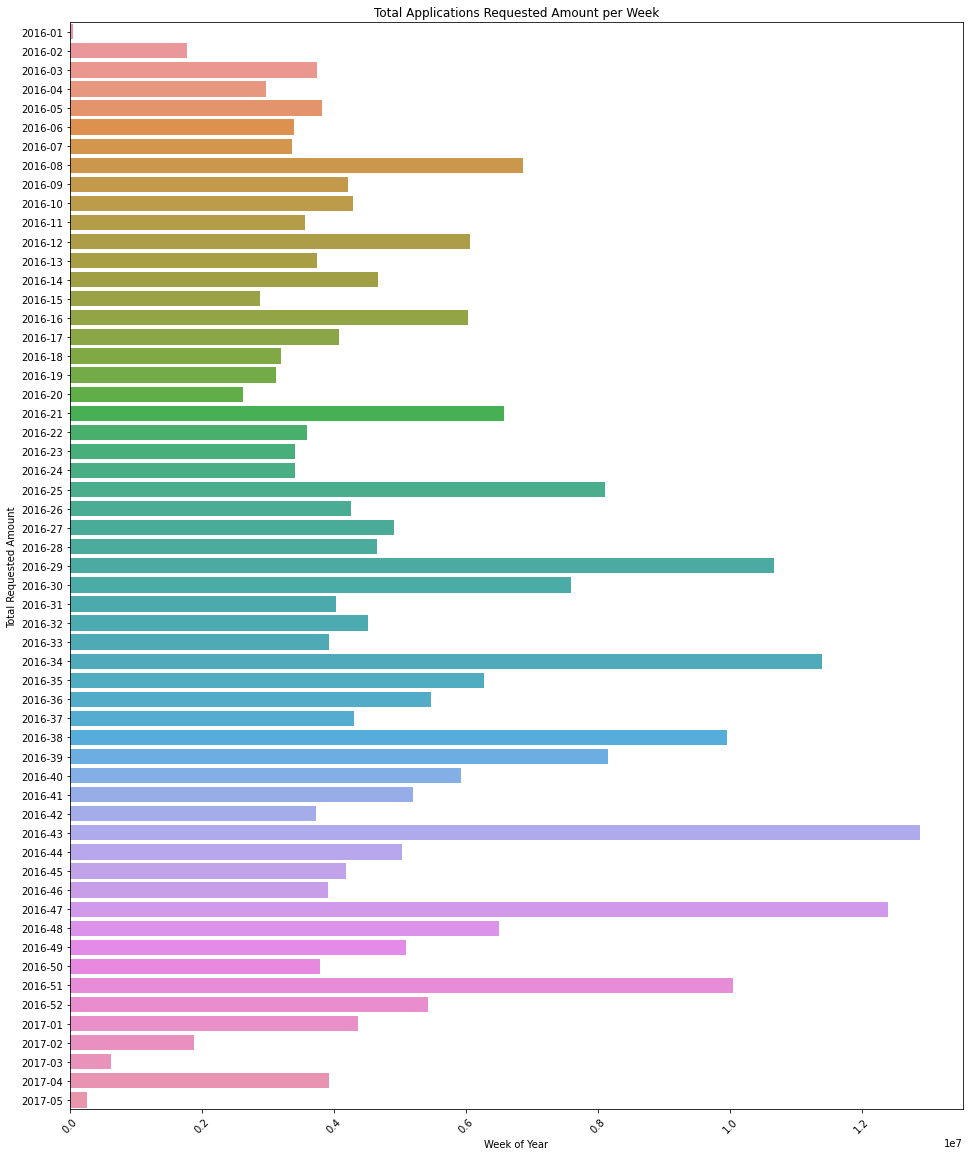

In [32]:
fig, ax = pyplot.subplots(figsize=(16,20))
g = sns.barplot(ax = ax, x='case_requested_amount', y='week', data = req_amt_per_week)
g.set_xlabel('Week of Year')
g.set_ylabel('Total Requested Amount')
g.set_title('Total Applications Requested Amount per Week')
pyplot.xticks(rotation=45);

In [33]:
apps_offers = applications_data[applications_data['event_name'] == 'O_Create Offer'] \
    .filter(['app_id','event_id','offered_amount']) \
    .rename(index=str, columns={'event_id':'offer_id'})
apps_offers

,app_id,offer_id,offered_amount
9,Application_652823628,Offer_148581083,20000.0
50,Application_1691306052,Offer_1669071500,6000.0
79,Application_428409768,Offer_1209840642,15000.0
87,Application_428409768,Offer_997411923,15000.0
135,Application_1746793196,Offer_1319158006,15700.0
...,...,...,...
1202122,Application_2103458006,Offer_682062790,15000.0
1202124,Application_2103458006,Offer_1395096354,15000.0
1202148,Application_59622033,Offer_1445809476,10000.0
1202202,Application_303923658,Offer_1734870628,30000.0


#### What is the total offered amount for succeeded applications per week?

In [35]:
applications_data[applications_data['event_name'] == 'O_Accepted'].groupby('app_id').offer_id.count().describe()

count    17228.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: offer_id, dtype: float64

As we can see in the above statistics, there is at most one accepted offer per application. Thus, we don't need to worry of multiple offers which were accepted and then discarded.

In [36]:
#Finding Applications accepted offers
apps_acc_offers = applications_data[applications_data['event_name'] == 'O_Accepted'] \
    .filter(['app_id','offer_id'])

apps_acc_offers

,app_id,offer_id
37,Application_652823628,Offer_148581083
113,Application_428409768,Offer_997411923
196,Application_1746793196,Offer_774210695
362,Application_619403287,Offer_1534843733
427,Application_1529124572,Offer_1217920740
...,...,...
1202030,Application_965278193,Offer_1880706415
1202065,Application_1331346987,Offer_1103493515
1202110,Application_1107993134,Offer_1811761338
1202190,Application_59622033,Offer_1445809476


In [37]:
apps_offers.head(2)

,app_id,offer_id,offered_amount
9,Application_652823628,Offer_148581083,20000.0
50,Application_1691306052,Offer_1669071500,6000.0


In [38]:
apps_acc_offers.head(2)

,app_id,offer_id
37,Application_652823628,Offer_148581083
113,Application_428409768,Offer_997411923


In [39]:
apps_pending[['week','app_id']]

,week,app_id
38,2016-02,Application_652823628
114,2016-02,Application_428409768
197,2016-04,Application_1746793196
363,2016-03,Application_619403287
428,2016-04,Application_1529124572
...,...,...
1202031,2017-02,Application_965278193
1202066,2017-04,Application_1331346987
1202111,2017-04,Application_1107993134
1202191,2017-04,Application_59622033


In [40]:
# Building Successful Applications offers dataset with offers and closing week metadata
succ_apps_offers = pd.merge(pd.merge(apps_acc_offers, apps_offers, how='inner'), 
                            apps_pending[['week','app_id']], 
                            how='inner')
succ_apps_offers

,app_id,offer_id,offered_amount,week
0,Application_652823628,Offer_148581083,20000.0,2016-02
1,Application_428409768,Offer_997411923,15000.0,2016-02
2,Application_1746793196,Offer_774210695,15700.0,2016-04
3,Application_619403287,Offer_1534843733,15000.0,2016-03
4,Application_1529124572,Offer_1217920740,5000.0,2016-04
...,...,...,...,...
17223,Application_965278193,Offer_1880706415,16000.0,2017-02
17224,Application_1331346987,Offer_1103493515,12500.0,2017-04
17225,Application_1107993134,Offer_1811761338,5000.0,2017-04
17226,Application_59622033,Offer_1445809476,10000.0,2017-04


In [41]:
# Computes the total offered amount of applications closed per week
succ_apps_offers_per_week = succ_apps_offers.groupby('week').offered_amount.sum().reset_index() \
                                .rename(index=str, columns={'offered_amount':'total_offered_amount'})
succ_apps_offers_per_week

,week,total_offered_amount
0,2016-01,66800.00
1,2016-02,2092550.00
2,2016-03,4146100.00
3,2016-04,3508050.00
4,2016-05,4017600.00
5,2016-06,3814550.00
6,2016-07,3599900.00
7,2016-08,7880650.00
8,2016-09,4852350.00
9,2016-10,4723550.00


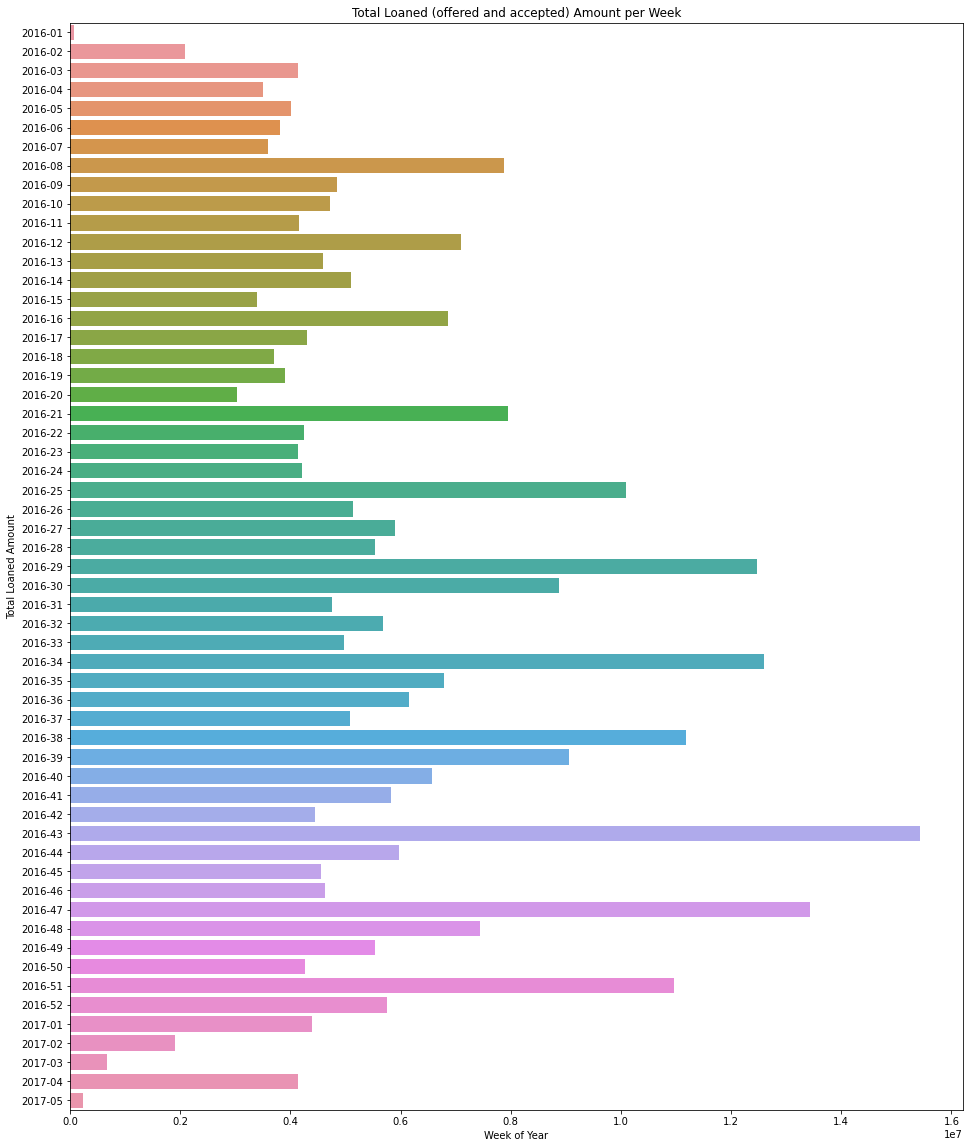

In [43]:
fig, ax = pyplot.subplots(figsize=(16,20))
g = sns.barplot(ax = ax, x='total_offered_amount', y='week', data = succ_apps_offers_per_week)
g.set_xlabel('Week of Year')
g.set_ylabel('Total Loaned Amount')
g.set_title('Total Loaned (offered and accepted) Amount per Week');

There seems to be a pattern, where the total amount of successful loans is usually low with spikes at every 4-5 weeks. Therefore, this data seems suitable for prediction.

### Structure data by date

In [44]:
applications_data['date'] = applications_data['datetime'].dt.strftime('%Y-%m-%d')

In [45]:
applications_data

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,...,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,datetime,week,date
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.304000+00:00,2015-53,2016-01-01
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.352000+00:00,2015-53,2016-01-01
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.774000+00:00,2015-53,2016-01-01
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.392000+00:00,2015-53,2016-01-01
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.403000+00:00,2015-53,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 06:33:02.212000+00:00,2017-01,2017-01-06
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 06:33:02.221000+00:00,2017-01,2017-01-06
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-16 09:51:21.114000+00:00,2017-03,2017-01-16
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144,2017-01-16 09:51:21.139000+00:00,2017-03,2017-01-16


### Explore Data per Day

#### What is the number of events per day? 

In [46]:
events_per_day = applications_data.date.value_counts().reset_index() \
                    .rename(index = str, columns = {'index':'day',
                                                    'date':'num_events'}) \
                    .sort_values('day') 
events_per_day

,day,num_events
391,2016-01-01,126
328,2016-01-02,554
385,2016-01-03,207
259,2016-01-04,2062
268,2016-01-05,1757
...,...,...
390,2017-01-28,167
396,2017-01-29,71
381,2017-01-30,219
389,2017-01-31,177


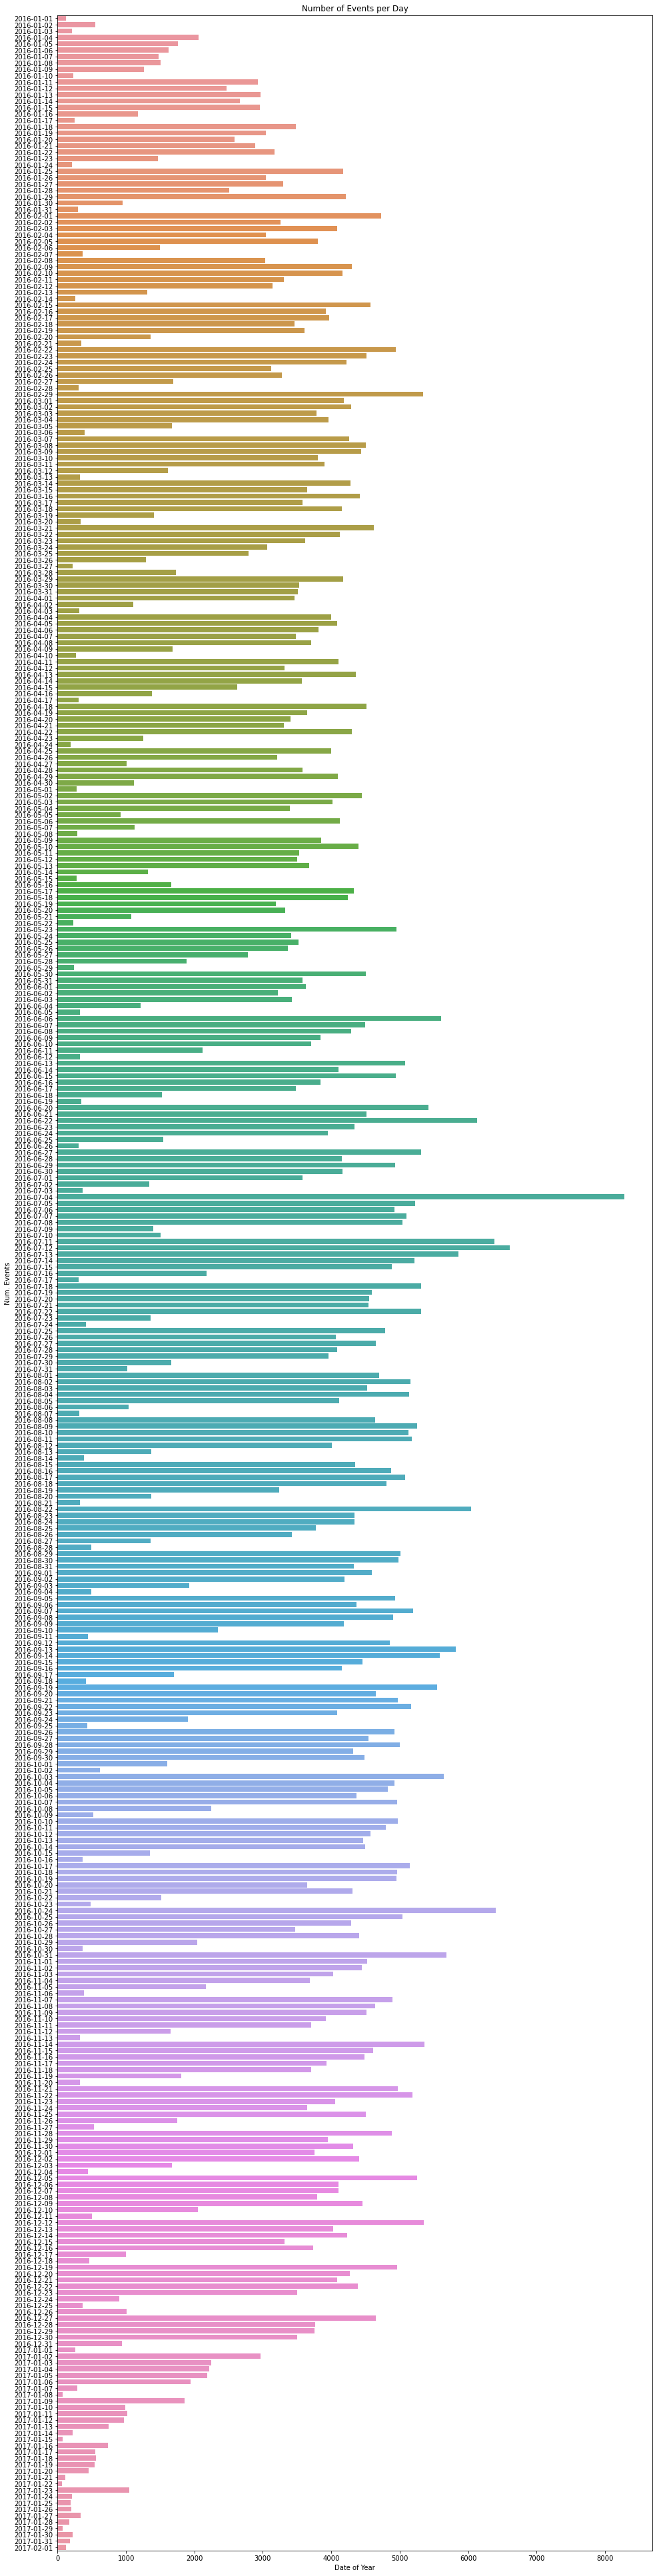

In [50]:
fig, ax = pyplot.subplots(figsize=(16,70))
g = sns.barplot(data = events_per_day, x ='num_events', y='day');
g.set_xlabel('Date of Year')
g.set_ylabel('Num. Events')
g.set_title('Number of Events per Day');

As we can see above, there is still a cyclic pattern in the number of events per day, which suggests a possibility of prediction viability using a daily granularity

### Analyze applications last activities / state 

In [53]:
(applications_data[applications_data['event_name'].str.startswith('A')]
                    .groupby('app_id')
                    .agg({'event_name': 'last'})
                    .reset_index()
                    .event_name.value_counts())

A_Pending       17228
A_Cancelled     10431
A_Denied         3752
A_Complete         53
A_Incomplete       42
A_Validating        3
Name: event_name, dtype: int64

Below, we see an explanation of each activity obtained from a bank specialist:

**Submitted**: a customer has submitted a new application from the website. A new application can also be started by the bank, in that case this state is skipped.

**Concept**: the application is in the concept state, that means that the customer just submitted it (or the bank started it), and a first assessment has been done automatically. An employee calls the customer to complete the application.

**Accepted**: after the call with the customer, the application is completed and assessed again. If there is a possibility to make an offer, the status is accepted. The employee now creates 1 or more offers.

**Complete**: the offers have been sent to the customer and the bank waits for the customer to return a signed offer along with the rest of the documents (payslip, ID etc)

**Validating**: the offer and documents are received and are checked. During this fase the status is validating.
Incomplete: if documents are not correct or some documents are still missing, the status is set to incomplete, which means the customers needs to send in documents.

**Pending**: if all documents are received and the assessment is positive, the loan is final and the customer is payed.

**Denied**: if somewhere in the process the loan cannot be offered to the customer, because the application doesn't fit the acceptance criteria, the application is declined, which results in the status 'denied'.

**Cancelled**: if the customer never sends in his documents or calls to tell he doesn't need the loan, the application is cancelled.

**Conclusion:**

As we can see, the only application activities which are final are: Pending, Denied and Cancelled.

In [54]:
(applications_data[applications_data['event_name'].isin(['A_Pending','A_Cancelled','A_Denied'])]
                    .groupby('app_id')
                    .event_name.count()
                    .describe())

count    31411.000000
mean         1.000032
std          0.005642
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: event_name, dtype: float64

In [55]:
final_activities_per_app = (applications_data[applications_data['event_name'].isin(['A_Pending','A_Cancelled','A_Denied'])]
                    .groupby('app_id')
                    .event_name.count()
                    .reset_index())
final_activities_per_app[final_activities_per_app['event_name'] > 1]

,app_id,event_name
1883,Application_1116429997,2


In [56]:
applications_data[applications_data['app_id'] == 'Application_1116429997']

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,...,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,datetime,week,date
1010930,Created,User_16,A_Create Application,Application,Application_1116429997,complete,2016-11-01 13:16:59.993000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01 13:16:59.993000+00:00,2016-44,2016-11-01
1010931,statechange,User_16,A_Concept,Application,ApplState_1223578881,complete,2016-11-01 13:16:59.995000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01 13:16:59.995000+00:00,2016-44,2016-11-01
1010932,Created,User_16,W_Complete application,Workflow,Workitem_1345907452,schedule,2016-11-01 13:17:00+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01 13:17:00+00:00,2016-44,2016-11-01
1010933,Obtained,User_16,W_Complete application,Workflow,Workitem_896734331,start,2016-11-01 13:17:00.002000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01 13:17:00.002000+00:00,2016-44,2016-11-01
1010934,Released,User_16,W_Complete application,Workflow,Workitem_1532943237,suspend,2016-11-01 13:17:14.039000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01 13:17:14.039000+00:00,2016-44,2016-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011008,statechange,User_99,A_Denied,Application,ApplState_537354599,complete,2016-11-28 15:37:33.101000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-28 15:37:33.101000+00:00,2016-48,2016-11-28
1011009,statechange,User_99,O_Refused,Offer,OfferState_1095803952,complete,2016-11-28 15:37:33.130000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,Offer_379926530,2016-11-28 15:37:33.130000+00:00,2016-48,2016-11-28
1011010,statechange,User_99,O_Refused,Offer,OfferState_1276897277,complete,2016-11-28 15:37:33.137000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1707958593,2016-11-28 15:37:33.137000+00:00,2016-48,2016-11-28
1011011,Deleted,User_99,W_Call incomplete files,Workflow,Workitem_1501053062,complete,2016-11-28 15:37:33.239000+00:00,Home improvement,Limit raise,Application_1116429997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-28 15:37:33.239000+00:00,2016-48,2016-11-28


As we can see, for almost all cases, the final acitivity appears only once per application. In the single exception, it contains the same final application twice but it is the same final application (A_Denied) which is repeated with a time offset of 2 minutes in the same day.

Thus, we can safely consider only the last of these activities occurred in an application to represent its final status.

### Analyze applications first activities / state 

In [57]:
(applications_data[applications_data['event_name'].str.startswith('A')]
                    .groupby('app_id')
                    .agg({'event_name': 'first'})
                    .reset_index()
                    .event_name.value_counts())

A_Create Application    31509
Name: event_name, dtype: int64

As we can see above, the only possible initial activity of an application is Create Application.

In [58]:
(applications_data[applications_data['event_name'] == 'A_Create Application']
                    .groupby('app_id')
                    .event_name.count()
                    .describe())

count    31509.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: event_name, dtype: float64

This activity always appears once and no more than once per application

### What is the distribution of the length of the application process ?

In [26]:
applications_data

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [59]:
apps_start_date = (applications_data[applications_data['event_name'] == 'A_Create Application']
                    .filter(['app_id','datetime'])
                    .rename(index=str, columns={'datetime':'start_date'}))
apps_start_date

,app_id,start_date
0,Application_652823628,2016-01-01 09:51:15.304000+00:00
40,Application_1691306052,2016-01-01 10:16:11.500000+00:00
71,Application_428409768,2016-01-01 11:19:38.177000+00:00
116,Application_1746793196,2016-01-01 12:34:53.911000+00:00
200,Application_828200680,2016-01-01 13:00:04.360000+00:00
...,...,...
1202068,Application_1107993134,2016-12-31 15:38:12.302000+00:00
1202113,Application_2103458006,2016-12-31 16:40:45.514000+00:00
1202136,Application_59622033,2016-12-31 16:43:28.509000+00:00
1202193,Application_303923658,2016-12-31 16:59:16.240000+00:00


In [60]:
app_final_activities = ['A_Pending','A_Cancelled','A_Denied']
apps_end_date = (applications_data[applications_data['event_name'].isin(app_final_activities)]
                    .groupby('app_id')
                    .agg({'datetime':'last'})
                    .rename(index=str, columns={'datetime':'end_date'})
                    .reset_index())
apps_end_date

,app_id,end_date
0,Application_1000086665,2016-09-05 06:00:36.710000+00:00
1,Application_1000158214,2016-06-10 11:02:01.278000+00:00
2,Application_1000311556,2016-05-05 06:00:48.903000+00:00
3,Application_1000334415,2016-09-29 07:45:34.349000+00:00
4,Application_1000339879,2016-03-30 09:11:48.596000+00:00
...,...,...
31406,Application_999507989,2016-03-23 14:08:12.525000+00:00
31407,Application_999544538,2016-07-26 06:35:18.180000+00:00
31408,Application_999632431,2017-01-16 07:00:30.429000+00:00
31409,Application_999993467,2016-07-19 11:03:45.115000+00:00


In [61]:
apps_start_end_date = (pd.merge(apps_start_date, apps_end_date, how='inner')
                          .assign(app_proc_duration = lambda x: (x.end_date - x.start_date).dt.days))
apps_start_end_date

,app_id,start_date,end_date,app_proc_duration
0,Application_652823628,2016-01-01 09:51:15.304000+00:00,2016-01-14 15:49:11.420000+00:00,13
1,Application_1691306052,2016-01-01 10:16:11.500000+00:00,2016-01-07 13:29:49.671000+00:00,6
2,Application_428409768,2016-01-01 11:19:38.177000+00:00,2016-01-14 07:00:14.450000+00:00,12
3,Application_1746793196,2016-01-01 12:34:53.911000+00:00,2016-01-28 12:18:51.292000+00:00,26
4,Application_828200680,2016-01-01 13:00:04.360000+00:00,2016-02-02 07:00:20.734000+00:00,31
...,...,...,...,...
31406,Application_1331346987,2016-12-31 15:35:41.171000+00:00,2017-01-23 06:19:27.972000+00:00,22
31407,Application_1107993134,2016-12-31 15:38:12.302000+00:00,2017-01-23 07:06:27.167000+00:00,22
31408,Application_59622033,2016-12-31 16:43:28.509000+00:00,2017-01-23 07:44:22.568000+00:00,22
31409,Application_303923658,2016-12-31 16:59:16.240000+00:00,2017-01-23 15:13:08.190000+00:00,22


In [62]:
apps_start_end_date.app_proc_duration.describe()

count    31411.000000
mean        21.255452
std         12.897043
min          0.000000
25%         11.000000
50%         19.000000
75%         31.000000
max        169.000000
Name: app_proc_duration, dtype: float64

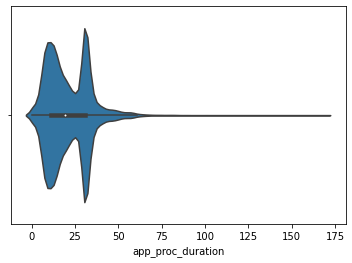

In [63]:
sns.violinplot(apps_start_end_date.app_proc_duration);

We can conclude from the above analysis that most applications take between two weeks to a month from start to end, with a median of 19 days. Thus, it makes sense to predict every week whether the application will finish in the next week. Of course, the more advanced in time the application is, the most likely it is to finish, but as we want to exercise the concept of a temporal analysis, we can overlook this issue.

### Prepare Base Dataset 

In [64]:
applications_data.head()

,action,org_resource,event_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,app_id,...,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,datetime,week,date
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.304000+00:00,2015-53,2016-01-01
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.352000+00:00,2015-53,2016-01-01
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.774000+00:00,2015-53,2016-01-01
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.392000+00:00,2015-53,2016-01-01
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.403000+00:00,2015-53,2016-01-01


#### Compute the Response Variable

In [65]:
apps_end_week = (applications_data[applications_data['event_name'].isin(app_final_activities)]
                    .groupby('app_id')
                    .agg({'week':'last'})
                    .rename(index=str, columns={'week':'end_week'})
                    .reset_index())
apps_end_week

,app_id,end_week
0,Application_1000086665,2016-36
1,Application_1000158214,2016-23
2,Application_1000311556,2016-18
3,Application_1000334415,2016-39
4,Application_1000339879,2016-13
...,...,...
31406,Application_999507989,2016-12
31407,Application_999544538,2016-30
31408,Application_999632431,2017-03
31409,Application_999993467,2016-29


In [74]:
base_df = (pd.merge(applications_data.filter(['app_id','week']).drop_duplicates(), 
         apps_end_week, 
         how='left')
    .assign(will_finish_this_week = lambda x: x.week == x.end_week))
base_df

,app_id,week,end_week,will_finish_this_week
0,Application_652823628,2015-53,2016-02,False
1,Application_652823628,2016-01,2016-02,False
2,Application_652823628,2016-02,2016-02,True
3,Application_1691306052,2015-53,2016-01,False
4,Application_1691306052,2016-01,2016-01,True
...,...,...,...,...
100418,Application_303923658,2017-03,2017-04,False
100419,Application_303923658,2017-04,2017-04,True
100420,Application_1350494635,2016-52,2017-03,False
100421,Application_1350494635,2017-01,2017-03,False


In [76]:
base_df.head(21)

,app_id,week,end_week,will_finish_this_week
0,Application_652823628,2015-53,2016-02,False
1,Application_652823628,2016-01,2016-02,False
2,Application_652823628,2016-02,2016-02,True
3,Application_1691306052,2015-53,2016-01,False
4,Application_1691306052,2016-01,2016-01,True
5,Application_428409768,2015-53,2016-02,False
6,Application_428409768,2016-01,2016-02,False
7,Application_428409768,2016-02,2016-02,True
8,Application_1746793196,2015-53,2016-04,False
9,Application_1746793196,2016-01,2016-04,False
